<a href="https://colab.research.google.com/github/vicentcamison/idal_ia3/blob/main/4%20Aprendizaje%20reforzado/Sesion%202/qlearning_alm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Q-learning

En este cuaderno se debe implementar QLearningAgent (sigue las instrucciones de cada método) y usarlo en una serie de pruebas a continuación.

In [5]:
import os
from IPython.display import clear_output
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1
        
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


La implementación del agente se realizará a traves de la construcción de una clase llamada QLearningAgent. Esto se debe a que necesitaremos funciones intermedias que se comuniquen entre ellas aunque no es estrictamente necesario darle esta estructura. La clase tendra que tener las siguientes funciones.

+ get_qvalue

+ set_qvalue

+ get_value

+ update

+ get_best_action

+ get_action

Antes de comenzar, conviene mencionar un pequeño 'truco'.

Para construir una tabla muy grande, pero que no vayamos a utilizar/rellenar en ese momento, podemos utilizar el truco siguiente:

```
dic = defaultdict(lambda: defaultdict(lambda: 0))
```

Esto genera una tabla vacía, que podemos ir rellenando cuando queramos y como queramos, sin que arroje ningún error

In [6]:
from collections import defaultdict

dic = defaultdict(lambda: defaultdict(lambda: 0))
dic['clase'] = 7
dic

defaultdict(<function __main__.<lambda>>, {'clase': 7})

Tal y como podemos ver, hemos inicializado un **defaultdict** vacío, y hemos podido posteriormente añadirle el elemento 'clase' con valor 7, sin que arroje ningún error.

Por último, hemos comprobado que en el interior del defaultdict tenemos, efectivamente, la pareja de valores 'clase' = 7

In [14]:
from collections import defaultdict
import random, math
import numpy as np

class QLearningAgent:
    def __init__(self, alpha, epsilon, discount, get_legal_actions):

        """
        Agente de Q-Learning
        Variables de instancia a las que tiene acceso
          - self.epsilon (problema de exploración)
          - self.alpha (tasa de aprendizaje)
          - self.discount (tasa de descuento aka gamma)

        Funciones que debes usar
          - self.get_legal_actions (state) {estado, hashable -> lista de acciones, cada una es hashable}
            que devuelve acciones legales para un estado
          - self.get_qvalue (estado, acción)
            que devuelve Q (estado, acción)
          - self.set_qvalue (estado, acción, valor)
            que establece Q (estado, acción): = valor
        """

        self.get_legal_actions = get_legal_actions
        self._qvalues = defaultdict(lambda: defaultdict(lambda: 0))
        self.alpha = alpha
        self.epsilon = epsilon
        self.discount = discount

    def get_qvalue(self, state, action):
        """ Returns Q(state,action) """
        return self._qvalues[state][action]

    def set_qvalue(self,state,action,value):
        """ Sets the Qvalue for [state,action] to the given value """
        self._qvalues[state][action] = value

        
    def get_value(self, state):
        """
        Calcula la estimación de V (s) del agente utilizando los valores q actuales
        V (s) = max_over_action Q (estado, acción) sobre posibles acciones.
        Nota: tenger en cuenta que los valores q pueden ser negativos.
        """
        possible_actions = self.get_legal_actions(state)

        #SI NO HAY ACCIONES POSIBLES DEVOLVEMOS 0
        if len(possible_actions) == 0:
            return 0.0

        #QUEDATE CON EL VALOR DE LA ACCION QUE MAXIMICE Q-VALUE
        #TU CÓDIGO AQUI
        value = max([self.get_qvalue(state, action) for action in possible_actions])
        return value

    def update(self, state, action, reward, next_state):
        """
        ACTIALIZA EL Q-VALOR SEGUN LA FORMULA QUE SE PRESENTA:
           Q(s,a) := (1 - alpha) * Q(s,a) + alpha * (r + gamma * max(Q(s',a')))
        """

        #PARAMETROS
        gamma = self.discount
        learning_rate = self.alpha

        #IMPLEMENTA LA FUNCION PRESENTADA EN LA DESCRIPCION DE ARRIBA

        value_target = reward + gamma*self.get_value(next_state)
        
        value = learning_rate*value_target + (1 - learning_rate)*self.get_qvalue(state, action)

        self.set_qvalue(state, action, value)

    
    def get_best_action(self, state):
        """
        Calcula la mejor acción para tomar en un estado (utilizando los valores q actuales).
        """
        #SELECCIONA LAS POSIBLES ACCIONES DADO EL ESTADO
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        #CALCULA LA MEJOR ACCION DADO EL ESTADO
        best_action = None
        best_q = float("-inf")
        for action in possible_actions:
            cur_q = self.get_qvalue(state,action)
            if cur_q > best_q:
                best_q = cur_q
                best_action  = action

        return best_action

    def get_action(self, state):
        """
        Calcula la acción a tomar en el estado actual, incluida la exploración.
        Con probabilidad self.epsilon, deberíamos realizar una acción aleatoria.
        de lo contrario - la mejor acción política (self.getPolicy).
        """

        # Pick Action
        possible_actions = self.get_legal_actions(state)

        #If there are no legal actions, return None
        if len(possible_actions) == 0:
            return None

        #PARAMETROS
        epsilon = self.epsilon
        exploration = random.random()

        #SELECCIONA UNA ACCION TENIENDO EN CUENTA LA EXPLORACIÓN CON EL EPSILON
        #TU CODIGO AQUI
        if exploration < epsilon:
            chosen_action = np.random.choice(possible_actions)
        else:
            chosen_action = self.get_best_action(state)

        return chosen_action


# Vamos a ver como funciona nuestro algoritmo

In [20]:
import gym
env = gym.make("Taxi-v3") #gym.make("CliffWalking-v0")

n_actions = env.action_space.n

In [21]:
agent = QLearningAgent(alpha=0.5, epsilon=0.25, discount=0.99,
                       get_legal_actions = lambda s: range(n_actions))

Originalmente no hemos explorado el entorno por lo que tenemos el diccionario de pares (estado,accion)-->(q-valor) vacion y mientras mas exploremos el entorno mas podremos llenarlo mejorando el comportamiento de nuestro algoritmo.

In [22]:
agent._qvalues

defaultdict(<function __main__.QLearningAgent.__init__.<locals>.<lambda>>, {})

Inicializamos nuestro entorno en un estado aleatorio

In [23]:
s = env.reset()
s

87

In [24]:
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



Tomamos la accion a tomar ya sea de manera aleatoria o tomando la mejor accion posible. Como nuestro Epsilon inicial va a ser 1 las primeras acciones serán aleatorias y a medida que exploremos dichas acciones se iran volviendo greedy.

In [25]:
a = agent.get_action(s)
a

5

Aplicamos nuestra accion al entorno y observamos lo que ocurre

In [26]:
next_s, r, done, _ = env.step(a)

In [27]:
print("reward: ",r, "accion: ", a, "Nuevo Estado: ", next_s)
env.render()

reward:  -10 accion:  5 Nuevo Estado:  87
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)


**Vamos a actualizar nuestra tabla de q-valores y el entorno dado la acción elegida y ver lo que ocurre con nuestra tabla de q-valores. Hemos explorado estando en el estado incial y como desconocemos el valor hasta realizar la accion todas las acciones tiene el valor 0 y despues de tomar la accion se promediara con el reward obenido.**

**Por último, se inicializa el estado de acciones del nuevo estado con todo 0 hasta que se realice la accion.**

In [28]:
agent._qvalues

defaultdict(<function __main__.QLearningAgent.__init__.<locals>.<lambda>>, {})

In [29]:
agent.update(s, a, r, next_s)
agent._qvalues

defaultdict(<function __main__.QLearningAgent.__init__.<locals>.<lambda>>,
            {87: defaultdict(<function __main__.QLearningAgent.__init__.<locals>.<lambda>.<locals>.<lambda>>,
                         {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: -5.0})})

**Así pues, asi es como va a funcionar nuestro algoritmo vamos a guardar los valores de las acciones que vamos realizando con el objetivo de tomar decisiones en relacion a estos y optimizar la política de nuestro agente.**

# JUGEMOS  EN TAXI

In [30]:
import gym
env = gym.make("Taxi-v3") #gym.make("CliffWalking-v0")

n_actions = env.action_space.n
agent = QLearningAgent(alpha=0.5, epsilon=0, discount=0.99,
                       get_legal_actions = lambda s: range(n_actions))

In [33]:
def play_and_train(env,agent,t_max=10**4):
    """
    Esta función debería
    - Ejecutar un juego completo, acciones dadas por la política greedy del agente.
    - agente update usando agent.update (...) siempre que sea posible
    - Devolver la recompensa total
    """
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        # PIDELE AL AGENTE UNA ACCION A TOMAR
        #TU CODIGO AQUI
        a = agent.get_action(s)
        
        next_s, r, done, _ = env.step(a)
        
        # ACTUALIZA TU ALGORITMO AGENT
        #TU CODIGO AQUI
        agent.update(s, a, r, next_s)
        
        #si quieres ver el juego desbloquea esto:
        #env.render()
        
        #ACTUALIZA EL ESTADO Y GUARDA EL REWARD
        s = next_s
        total_reward += r
        if done: break
        
    return total_reward
    
        
    

eps = 0.0 mean reward = 6.8


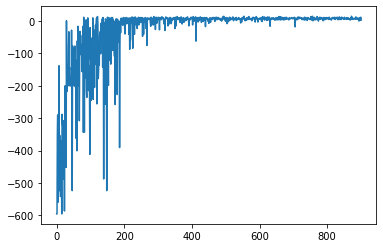

In [34]:
from IPython.display import clear_output
env.reset()
rewards = []
diccios_intermedios=[]
for i in range(1000):
    rewards.append(play_and_train(env, agent,t_max=10**(5)))#
    agent.epsilon *= 0.99
    diccios_intermedios.append(agent._qvalues)
    
    if i %100 ==0:
        clear_output(True)
        print('eps =', agent.epsilon, 'mean reward =', np.mean(rewards[-10:]))
        plt.plot(rewards)
        plt.show()
        

In [35]:
play_and_train(env, agent,t_max=10**(5))

6.0